<a href="https://colab.research.google.com/github/TwoGunTitan/Fake-Review-detection/blob/main/Yelp_Fake_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake Reviews Detection in Yelp Dataset

This section imports various libraries and performs several data preprocessing and analysis tasks using Python in a Jupyter/Colab environment.

1. **Data Import and Preprocessing**: It imports the necessary libraries including pandas, seaborn, matplotlib, nltk, and others. It then loads a dataset from Google Drive, applies label mapping, and drops unnecessary columns.

2. **Sentiment Analysis**: It utilizes NLTK's Vader sentiment analyzer to compute sentiment scores for each review text in the dataset. The sentiment scores are added as a new column to the dataframe.

3. **Readability Analysis**: It calculates the Flesch Reading Ease score for each review text and adds it as a new column to the dataframe.

4. **Data Exploration and Cleaning**: It handles duplicate occurrences, drops duplicates, and resets the dataframe index. It also displays information about the dataframe, including summary statistics for numerical and categorical columns.

5. **Correlation Analysis**: It computes the correlation matrix between numerical features in the dataset and visualizes it using a heatmap.

This code snippet provides a comprehensive overview of data preprocessing and analysis techniques commonly used in text data analysis, sentiment analysis, and correlation analysis tasks.


In [ ]:
!pip install textstat

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textstat import flesch_reading_ease
import string
import re
import warnings

# Set visualization style
sns.set_style('darkgrid')
%matplotlib inline
warnings.simplefilter("ignore")

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Mount Google Drive if running on Colab
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/yelp_fake_reviews.csv", encoding="latin1")  # Encoded as latin1 due to special characters

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define function to map labels
def map_labels(label):
    if label == 1:
        return 1
    elif label == -1:
        return 0
    else:
        return label

# Apply label mapping
df['LABEL'] = df['LABEL'].apply(map_labels)

# Drop unnecessary columns
df.drop(["RATING_DEVIATION", "RATING_CATEGORY",
         "SINGLE_RATING_CATEGORY", "REVIEW_COUNT_DATE",
         "MAX_USER_REVIEWS_DAY",
         "RATIO_POSITIVE_NEGATIVE", "Unnamed: 0", "PERCENTAGE_POSITIVE_REVIEWS"], axis=1, inplace=True)

# Apply label mapping again
df['LABEL'] = df['LABEL'].apply(map_labels)

# Display first few rows of the dataframe
df.head()

,USER_ID,PRODUCT_ID,RATING,DATE,LABEL,REVIEW_TEXT,AVERAGE_RATING,TOTAL_PRODUCT_REVIEWS,REVIEW_LENGTH,SAME_DATE_MULTIPLE_REVIEWS,TIMESTAMP_DIFFERENCE,AVERAGE_USER_REVIEW_LENGTH,TOTAL_USER_REVIEWS
0,66563,416,4,2014-12-10,0,Great.....,3.767293,2183,10,0,0 days,11.500000,2
1,74755,449,4,2013-03-26,1,My family and I had Bubby's brunch on a Saturd...,3.396552,812,824,0,1723 days,724.666667,12
2,49165,237,3,2011-10-11,1,"I really like this place, but they need to get...",3.799003,602,314,0,0 days,314.000000,1
3,75653,363,5,2014-01-14,1,This is one of my favorite places in the US. A...,3.990361,2075,280,0,0 days,280.000000,1
4,32402,100,4,2014-12-02,1,Make sure you go with a small group of friends...,3.951812,2677,478,0,398 days,255.666667,3


In [ ]:
# Define function to add Vader sentiment score
def add_vader_sentiment_score(df):
    sid = SentimentIntensityAnalyzer()
    df['SENTIMENT_SCORE'] = df['REVIEW_TEXT'].apply(lambda d: sid.polarity_scores(d)['compound'])

# Add Vader sentiment score to the dataframe
add_vader_sentiment_score(df)

# Display first few rows of the dataframe with sentiment score added
df.head()

,USER_ID,PRODUCT_ID,RATING,DATE,LABEL,REVIEW_TEXT,AVERAGE_RATING,TOTAL_PRODUCT_REVIEWS,REVIEW_LENGTH,SAME_DATE_MULTIPLE_REVIEWS,TIMESTAMP_DIFFERENCE,AVERAGE_USER_REVIEW_LENGTH,TOTAL_USER_REVIEWS,SENTIMENT_SCORE
0,66563,416,4,2014-12-10,0,Great.....,3.767293,2183,10,0,0 days,11.500000,2,0.0000
1,74755,449,4,2013-03-26,1,My family and I had Bubby's brunch on a Saturd...,3.396552,812,824,0,1723 days,724.666667,12,0.9162
2,49165,237,3,2011-10-11,1,"I really like this place, but they need to get...",3.799003,602,314,0,0 days,314.000000,1,-0.7681
3,75653,363,5,2014-01-14,1,This is one of my favorite places in the US. A...,3.990361,2075,280,0,0 days,280.000000,1,0.9687
4,32402,100,4,2014-12-02,1,Make sure you go with a small group of friends...,3.951812,2677,478,0,398 days,255.666667,3,0.8805


In [ ]:
# Define function to add readability score
def add_readability_score(df):
    df['READABILITY_FRE'] = df['REVIEW_TEXT'].apply(lambda d: flesch_reading_ease(d))

# Add readability score to the dataframe
add_readability_score(df)

# Display first few rows of the dataframe with readability score added
df.head()

,USER_ID,PRODUCT_ID,RATING,DATE,LABEL,REVIEW_TEXT,AVERAGE_RATING,TOTAL_PRODUCT_REVIEWS,REVIEW_LENGTH,SAME_DATE_MULTIPLE_REVIEWS,TIMESTAMP_DIFFERENCE,AVERAGE_USER_REVIEW_LENGTH,TOTAL_USER_REVIEWS,SENTIMENT_SCORE,READABILITY_FRE
0,66563,416,4,2014-12-10,0,Great.....,3.767293,2183,10,0,0 days,11.500000,2,0.0000,121.22
1,74755,449,4,2013-03-26,1,My family and I had Bubby's brunch on a Saturd...,3.396552,812,824,0,1723 days,724.666667,12,0.9162,82.65
2,49165,237,3,2011-10-11,1,"I really like this place, but they need to get...",3.799003,602,314,0,0 days,314.000000,1,-0.7681,67.25
3,75653,363,5,2014-01-14,1,This is one of my favorite places in the US. A...,3.990361,2075,280,0,0 days,280.000000,1,0.9687,84.17
4,32402,100,4,2014-12-02,1,Make sure you go with a small group of friends...,3.951812,2677,478,0,398 days,255.666667,3,0.8805,81.67


In [ ]:
# Count duplicate occurrences
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

# Remove duplicates and reset index
df = df.drop_duplicates().reset_index(drop=True)

# Display information about the dataframe
df.info()

# Display summary statistics of numerical columns
df.describe()

# Display summary statistics of categorical columns
df.describe(include=['O'])

# Group by label and display statistics
print(df.groupby("LABEL").describe())

# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

Number of duplicates in dataset:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   USER_ID                     20000 non-null  int64  
 1   PRODUCT_ID                  20000 non-null  int64  
 2   RATING                      20000 non-null  int64  
 3   DATE                        20000 non-null  object 
 4   LABEL                       20000 non-null  int64  
 5   REVIEW_TEXT                 20000 non-null  object 
 6   AVERAGE_RATING              20000 non-null  float64
 7   TOTAL_PRODUCT_REVIEWS       20000 non-null  int64  
 8   REVIEW_LENGTH               20000 non-null  int64  
 9   SAME_DATE_MULTIPLE_REVIEWS  20000 non-null  int64  
 10  TIMESTAMP_DIFFERENCE        20000 non-null  object 
 11  AVERAGE_USER_REVIEW_LENGTH  20000 non-null  float64
 12  TOTAL_USER_REVIEWS          20000 non-null  int64  


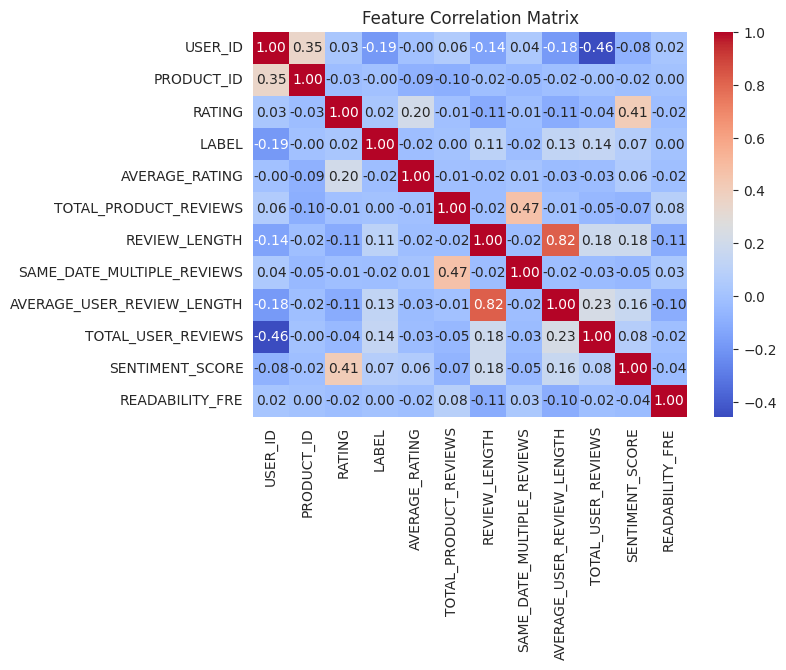

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing features
# Compute correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

The next part demonstrates the usage of various machine learning classifiers for classification tasks. It imports necessary libraries from scikit-learn and initializes a dictionary containing different classifiers such as XGBoost, CatBoost, RandomForest, and others.

The text preprocessing function is defined to clean text data by removing special characters and converting text to lowercase. Then, the 'REVIEW_TEXT' column in the dataframe is preprocessed using this function.

Next, the code selects features and target variables, splits the data into training and testing sets, and performs feature scaling using MinMaxScaler.

The classifiers are trained on the training data, and predictions are made on the testing data. Evaluation metrics such as accuracy, precision, and F1-score are calculated for each classifier.

Finally, the evaluation results are stored in a DataFrame and sorted by accuracy to identify the best-performing classifier.

The provided code conducts multiple evaluations for each classifier in the `classifiers` dictionary. Firstly, it iterates over the classifiers to calculate and visualize confusion matrices, utilizing `sns.heatmap` to display each matrix. Then, it computes ROC curves, storing false positive rates, true positive rates, and area under the curves (ROC AUC) for classifiers that support `predict_proba`, plotting the curves with `plt.plot`. Next, precision-recall curves are generated, saving precision and recall values and plotting them. Finally, the code generates calibration curves for classifiers supporting `predict_proba`, displaying the calibration curves alongside a baseline line using `plt.plot`. Each evaluation provides insights into classifier performance and aids in understanding model behavior across various metrics.

This code provides a practical approach to comparing the performance of multiple classifiers on a given dataset and selecting the most suitable one for the classification task at hand.


In [ ]:
!pip install catboost

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import roc_auc_score

# Initialize classifiers
classifiers = {}

# Add classifiers to the dictionary
classifiers.update({"XGBClassifier": XGBClassifier(eval_metric='logloss',
                                                   objective='binary:logistic',
                                                   use_label_encoder=False)})
classifiers.update({"CatBoostClassifier": CatBoostClassifier(silent=True)})
classifiers.update({"LinearSVC": LinearSVC(max_iter=10000)})
classifiers.update({"MultinomialNB": MultinomialNB()})
classifiers.update({"LGBMClassifier": LGBMClassifier()})
classifiers.update({"RandomForestClassifier": RandomForestClassifier()})
classifiers.update({"DecisionTreeClassifier": DecisionTreeClassifier()})
classifiers.update({"ExtraTreeClassifier": ExtraTreeClassifier()})
classifiers.update({"AdaBoostClassifier": AdaBoostClassifier()})
classifiers.update({"KNeighborsClassifier": KNeighborsClassifier()})
classifiers.update({"RidgeClassifier": RidgeClassifier()})
classifiers.update({"SGDClassifier": SGDClassifier()})
classifiers.update({"BaggingClassifier": BaggingClassifier()})
classifiers.update({"BernoulliNB": BernoulliNB()})
classifiers.update({"LogisticRegression": LogisticRegression()})
classifiers.update({"SVM": SVC()})

# Function to preprocess text data
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()
    cleaned = []

    for token in tokens:
        cleaned.append(token)

    return " ".join(cleaned)

# Apply text preprocessing to 'REVIEW_TEXT' column
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].apply(text_preprocessing)

# Display first few preprocessed text samples
df['REVIEW_TEXT'].head()

0                                                great
1    my family and i had bubby s brunch on a saturd...
2    i really like this place but they need to get ...
3    this is one of my favorite places in the us aw...
4    make sure you go with a small group of friends...
Name: REVIEW_TEXT, dtype: object

In [ ]:
# Select features and target variable
X = df[['RATING', 'AVERAGE_RATING', 'TOTAL_PRODUCT_REVIEWS',
        'REVIEW_LENGTH', 'SAME_DATE_MULTIPLE_REVIEWS', 'READABILITY_FRE',
        'AVERAGE_USER_REVIEW_LENGTH', 'TOTAL_USER_REVIEWS', 'SENTIMENT_SCORE']]
Y = df['LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize list to store model evaluation results
results = []

# Loop through each classifier
for key, clf in classifiers.items():
    # Train classifier on training data
    clf.fit(X_train_scaled, y_train)
    # Make predictions using current classifier
    predictions = clf.predict(X_test_scaled)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)  # Calculating recall
    f1score = f1_score(y_test, predictions)

    # Check if the classifier supports predict_proba
    if hasattr(clf, "predict_proba"):
        # Calculate ROC AUC score
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    # Store evaluation results in a dictionary
    result = {'model': key,
              'accuracy': accuracy,
              'precision': precision,
              'recall': recall,
              'f1_score': f1score,
              'roc_auc': roc_auc
             }

    # Append the result dictionary to the list
    results.append(result)

# Convert the list of dictionaries to a DataFrame
df_models = pd.concat([pd.DataFrame([result]) for result in results], ignore_index=True)

# Sort the DataFrame by accuracy
df_models = df_models.sort_values(by='accuracy', ascending=False)

# Display the DataFrame
print(df_models)

[LightGBM] [Info] Number of positive: 14338, number of negative: 1662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.896125 -> initscore=2.154892
[LightGBM] [Info] Start training from score 2.154892
                     model  accuracy  precision    recall  f1_score   roc_auc
2                LinearSVC   0.89700   0.897000  1.000000  0.945704      None
3            MultinomialNB   0.89700   0.897000  1.000000  0.945704  0.701393
10         RidgeClassifier   0.89700   0.897000  1.000000  0.945704      None
11           SGDClassifier   0.89700   0.897000  1.000000  0.945704      None
13             BernoulliNB   0.89700   0.897000  1.00000

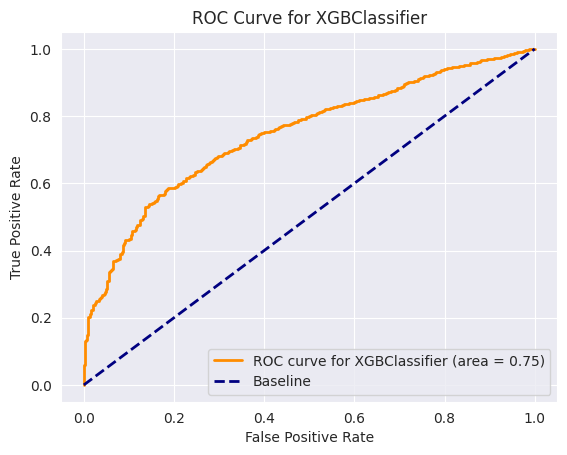

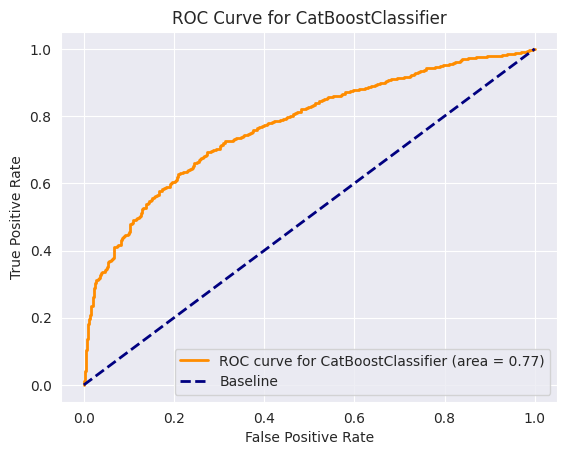

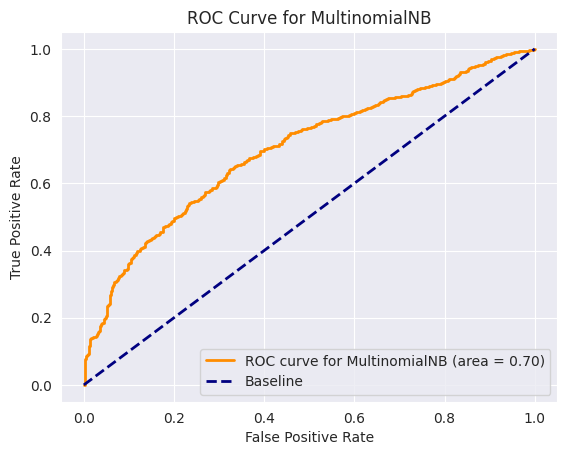

[LightGBM] [Info] Number of positive: 14338, number of negative: 1662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.896125 -> initscore=2.154892
[LightGBM] [Info] Start training from score 2.154892


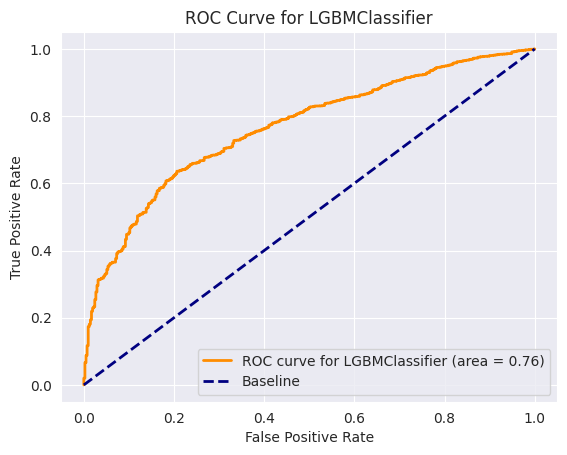

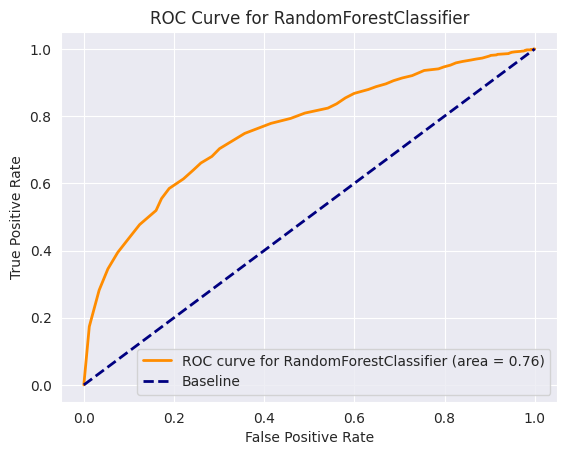

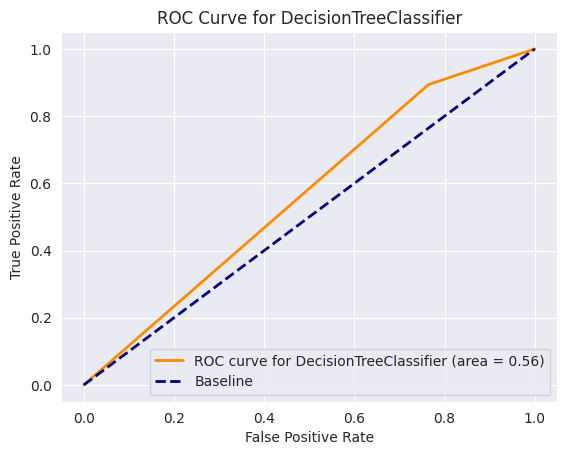

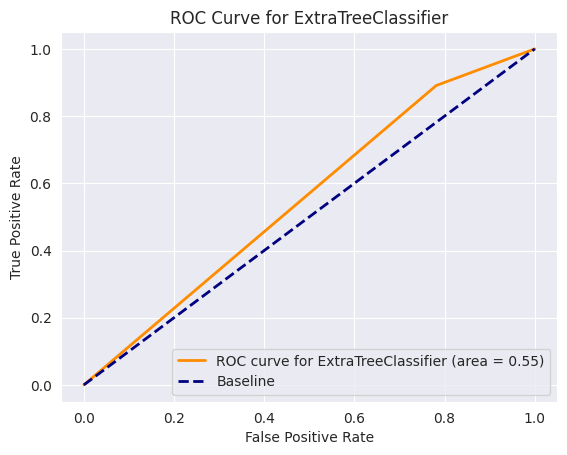

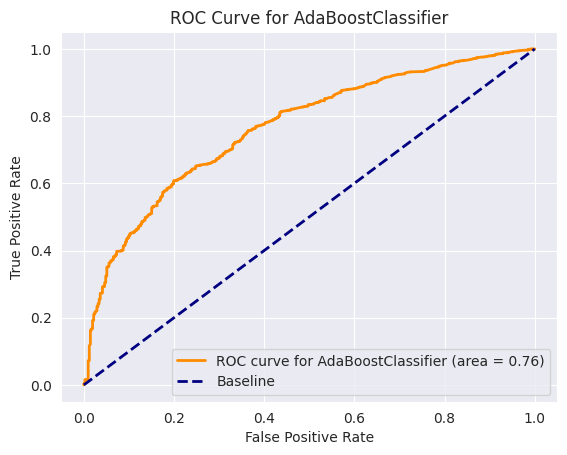

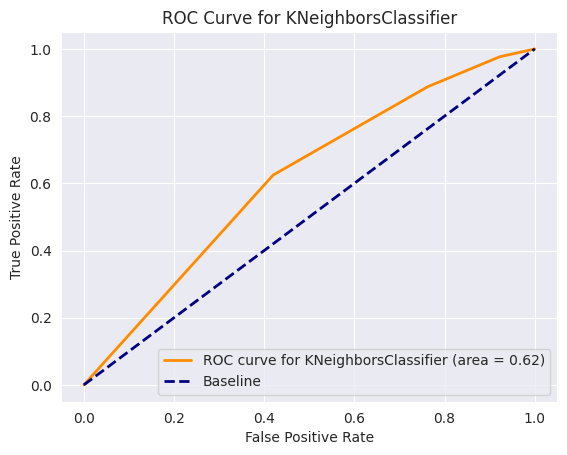

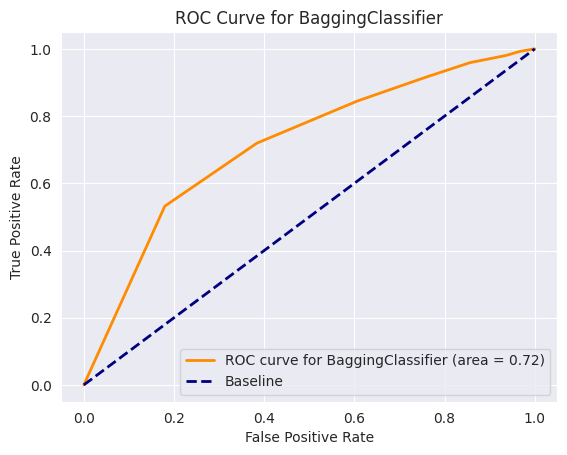

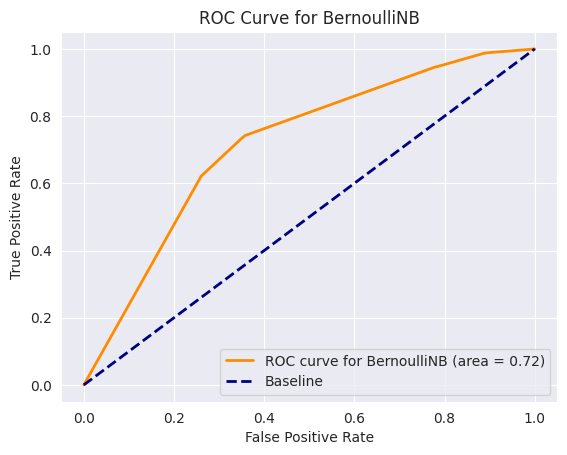

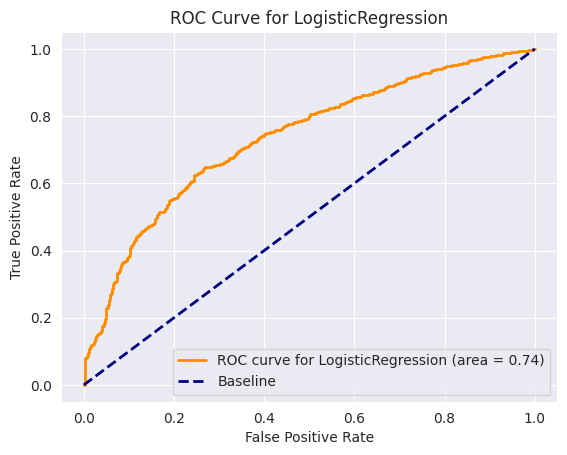

In [ ]:
# Plot ROC Curves

from sklearn.metrics import roc_curve, auc

# Initialize an empty list to store evaluation results
roc_data = []

# Loop through each classifier
for key in classifiers:
    # Current classifier
    clf = classifiers[key]
    # Train classifier on training data
    clf.fit(X_train_scaled, y_train)
    # Check if model supports predict_proba for ROC curve
    if hasattr(clf, "predict_proba"):
        # Make predictions using current classifier
        predictions = clf.predict(X_test_scaled)
        # Calculate evaluation metrics
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1])
        roc_auc = auc(fpr, tpr)
        # Store fpr, tpr, and roc_auc for current classifier
        roc_data.append((fpr, tpr, roc_auc))
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve for {key} (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {key}')
        plt.legend(loc="lower right")
        plt.show()

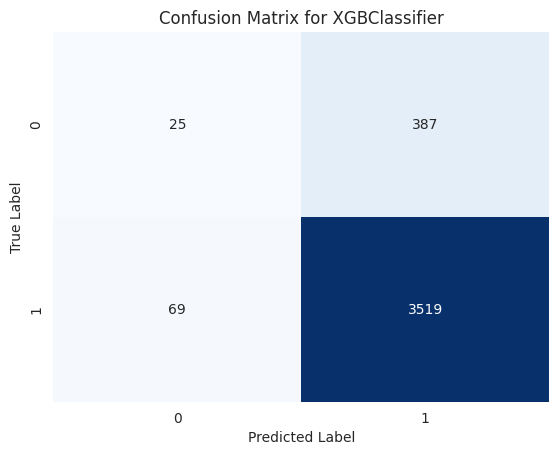

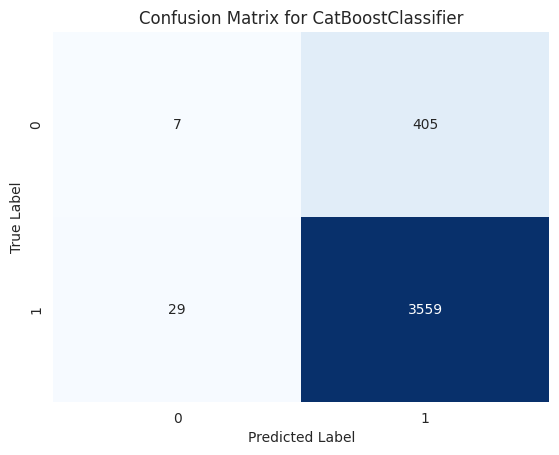

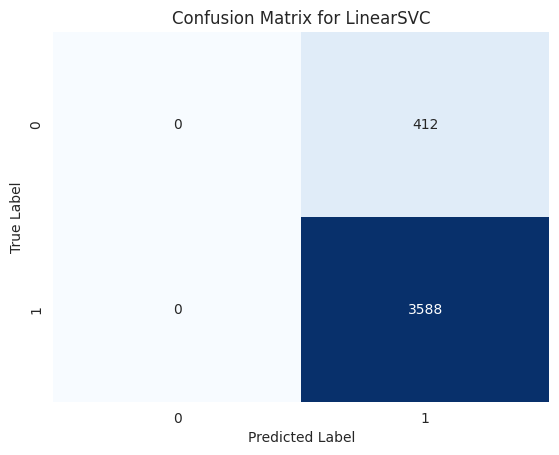

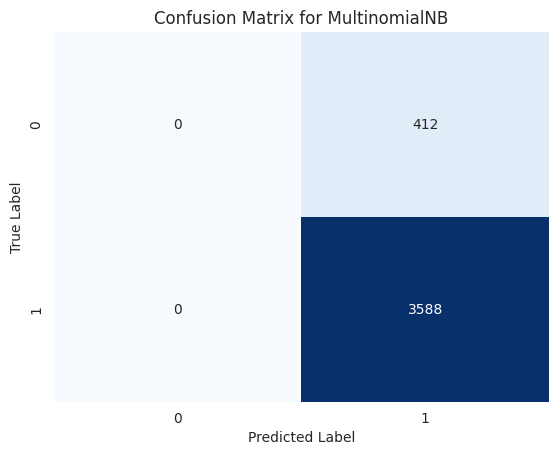

[LightGBM] [Info] Number of positive: 14338, number of negative: 1662
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.896125 -> initscore=2.154892
[LightGBM] [Info] Start training from score 2.154892


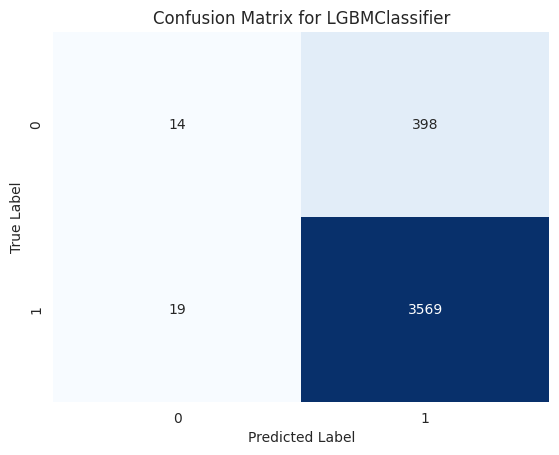

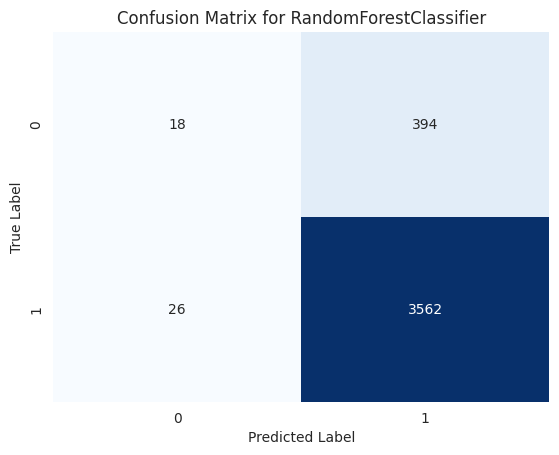

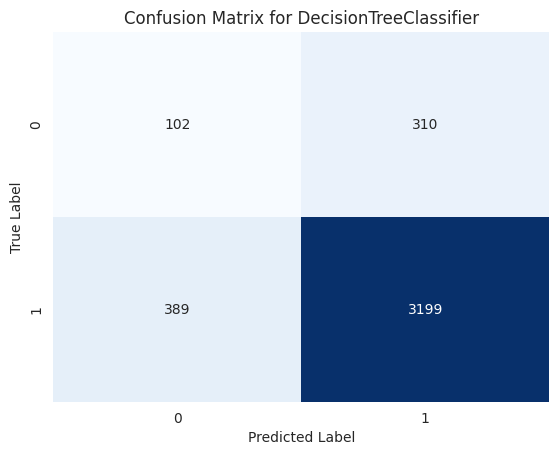

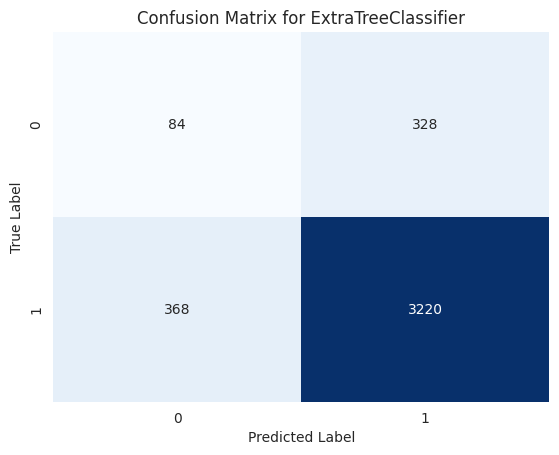

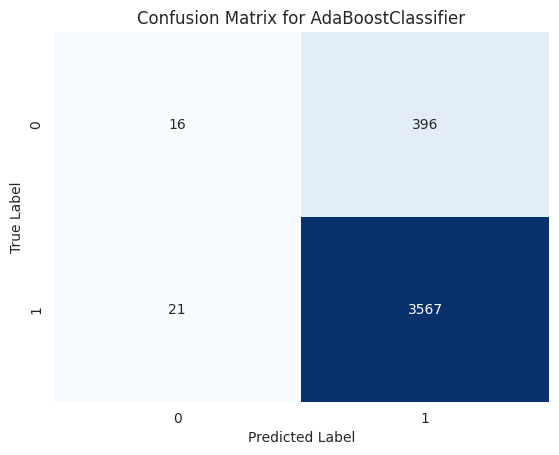

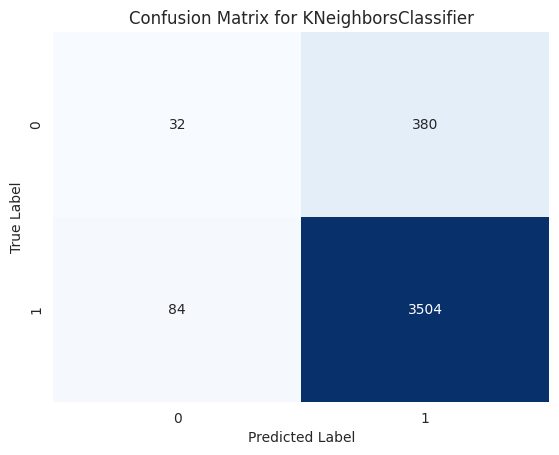

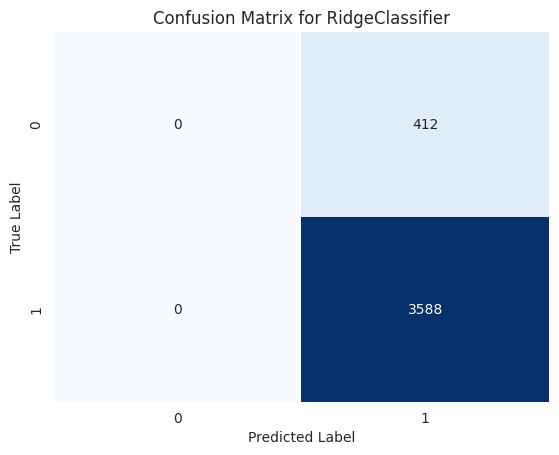

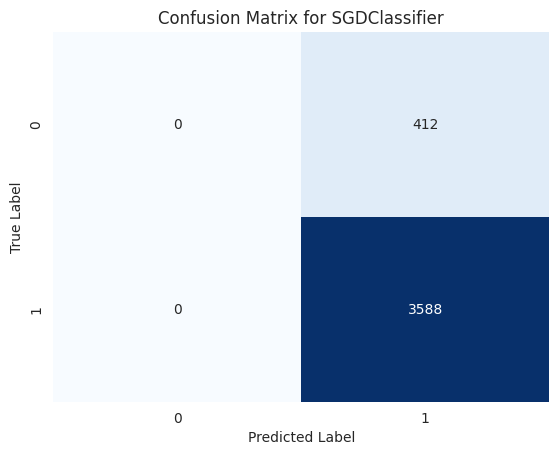

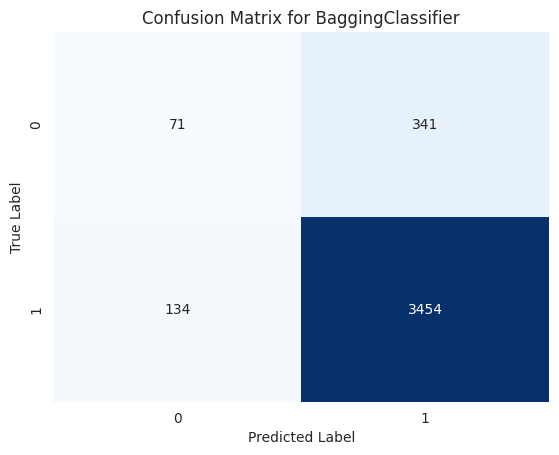

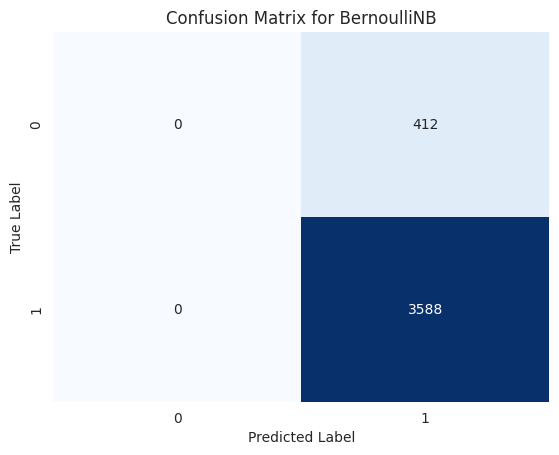

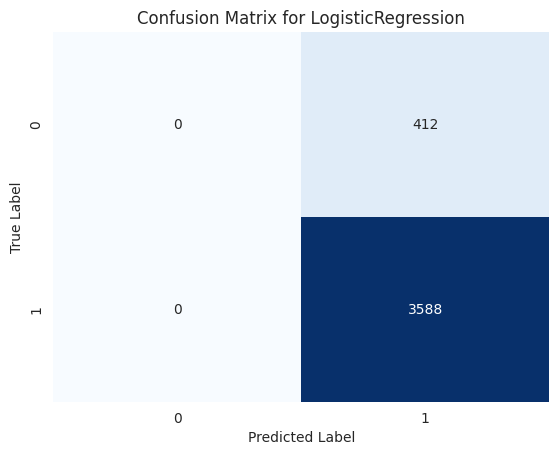

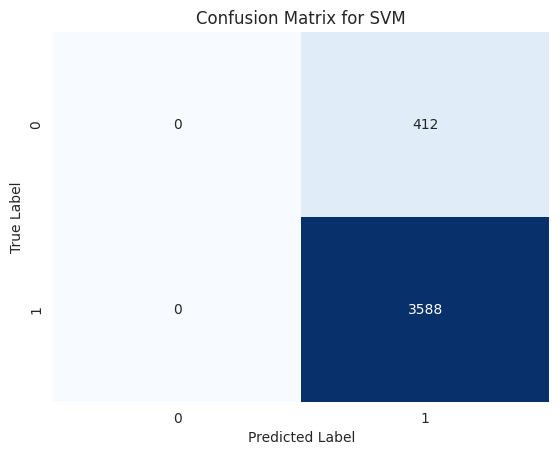

In [ ]:
# Plot confusion matrices

from sklearn.metrics import confusion_matrix

# Loop through each classifier
for key in classifiers:
    # Current classifier
    clf = classifiers[key]
    # Train classifier on training data
    clf.fit(X_train_scaled, y_train)
    # Make predictions using current classifier
    predictions = clf.predict(X_test_scaled)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)
    # Plot confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {key}')
    plt.show()

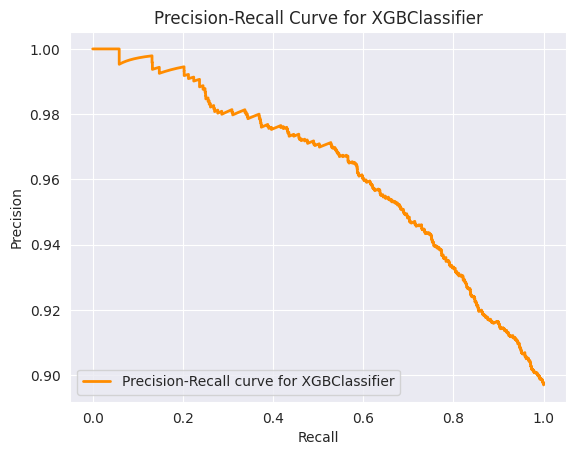

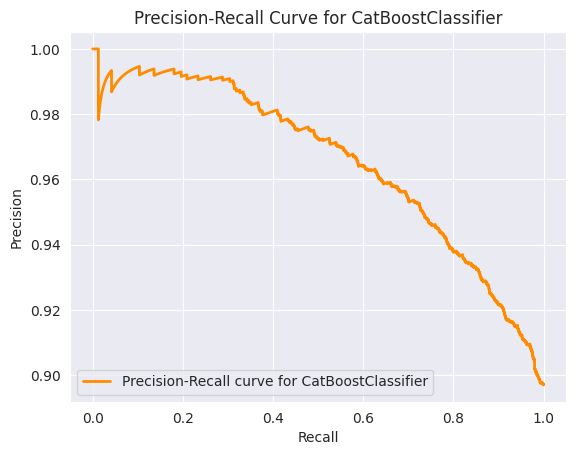

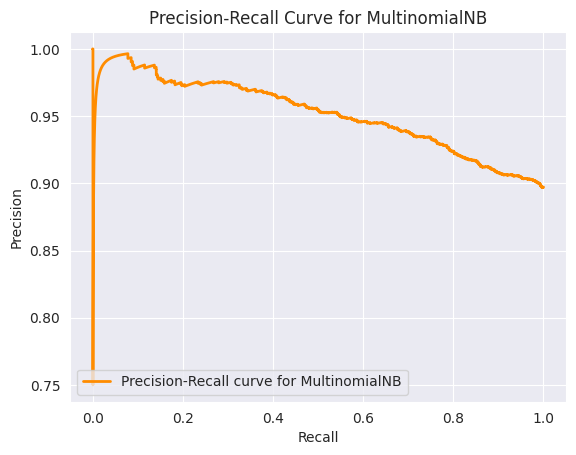

[LightGBM] [Info] Number of positive: 14338, number of negative: 1662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.896125 -> initscore=2.154892
[LightGBM] [Info] Start training from score 2.154892


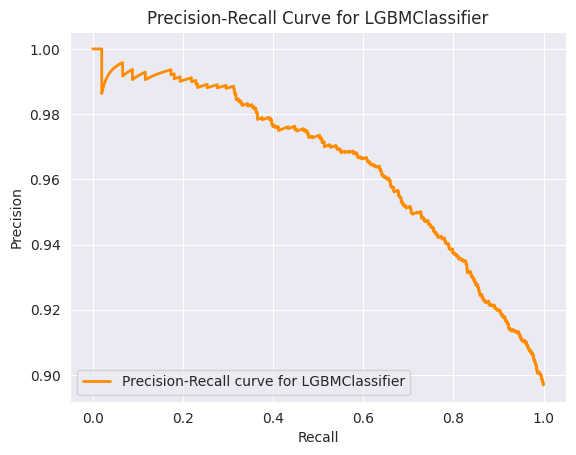

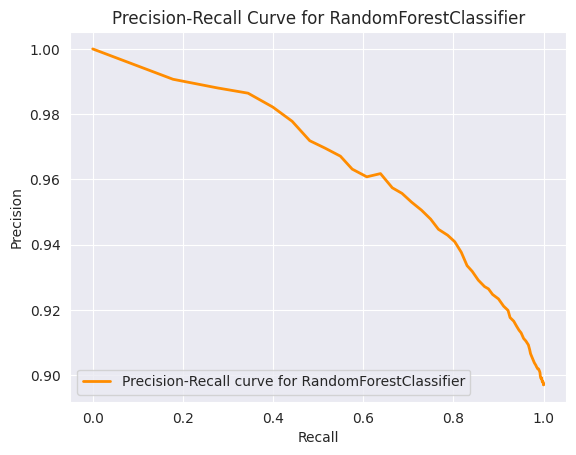

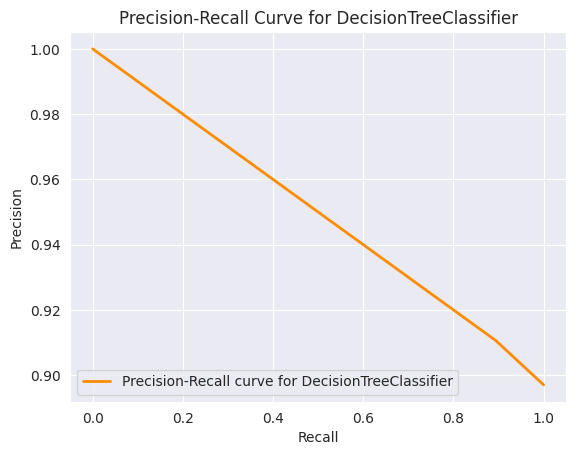

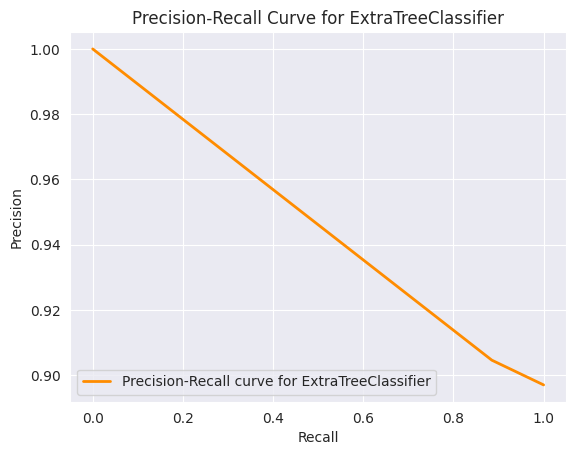

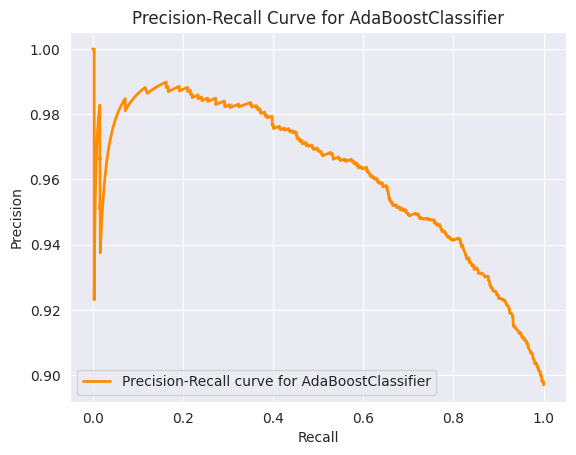

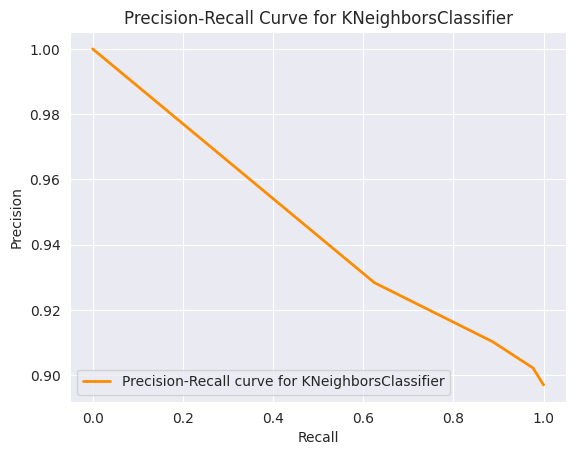

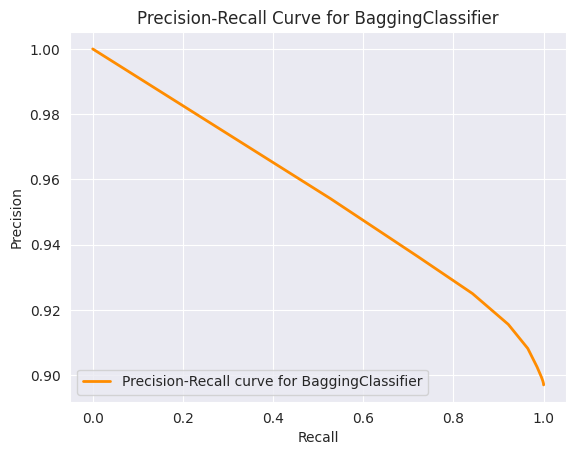

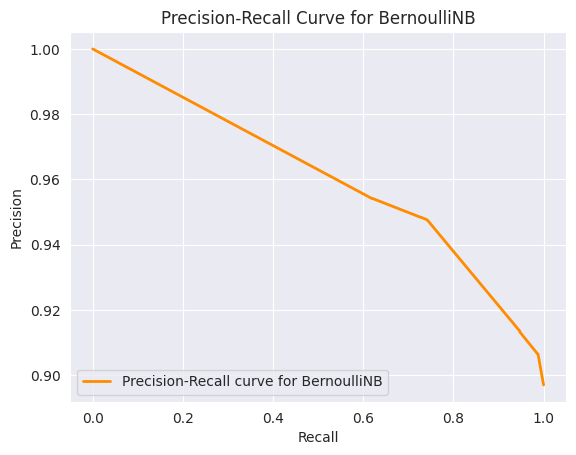

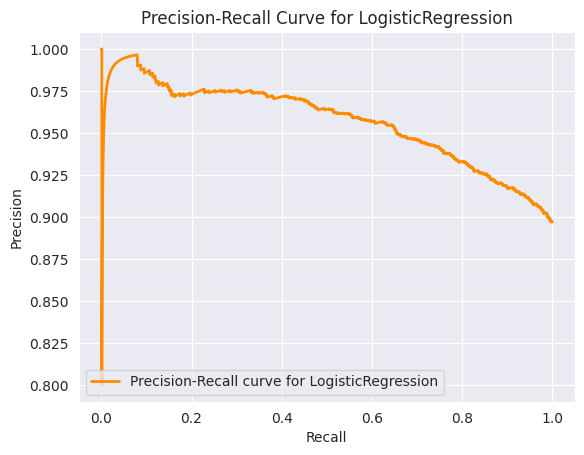

In [ ]:
# Plot Precision-Recall Curves

from sklearn.metrics import precision_recall_curve

# Initialize an empty list to store evaluation results
pr_data = []

# Loop through each classifier
for key in classifiers:
    # Current classifier
    clf = classifiers[key]
    # Train classifier on training data
    clf.fit(X_train_scaled, y_train)
    # Check if model supports predict_proba for precision-recall curve
    if hasattr(clf, "predict_proba"):
        # Make predictions using current classifier
        predictions = clf.predict(X_test_scaled)
        # Calculate precision-recall curve
        precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1])
        # Store precision, recall for current classifier
        pr_data.append((precision, recall))
        # Plot precision-recall curve
        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2,
                 label=f'Precision-Recall curve for {key}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for {key}')
        plt.legend(loc="lower left")
        plt.show()

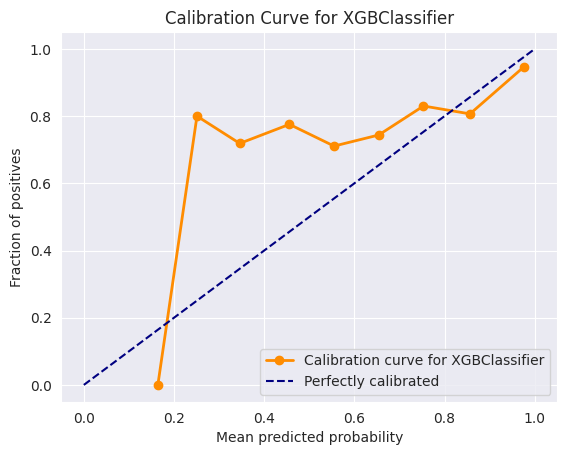

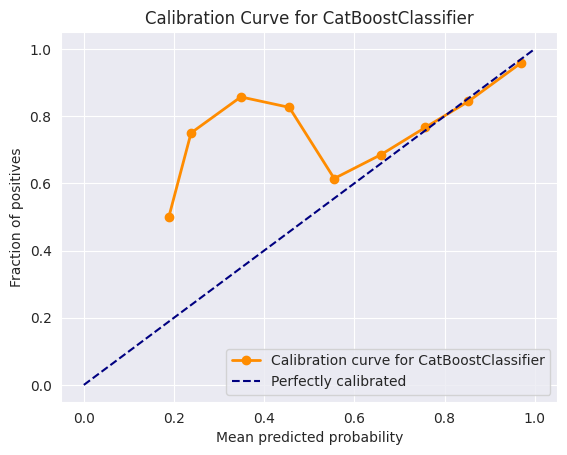

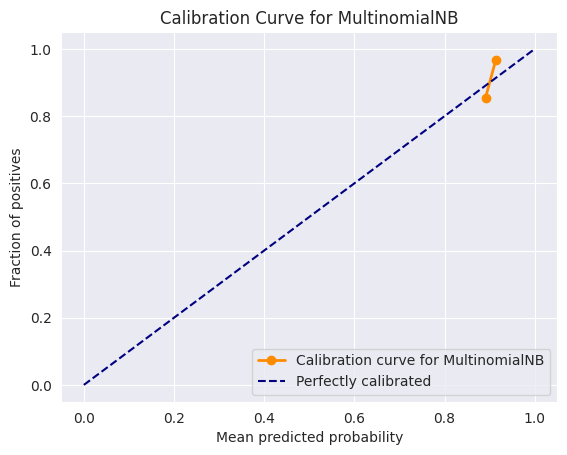

[LightGBM] [Info] Number of positive: 14338, number of negative: 1662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.896125 -> initscore=2.154892
[LightGBM] [Info] Start training from score 2.154892


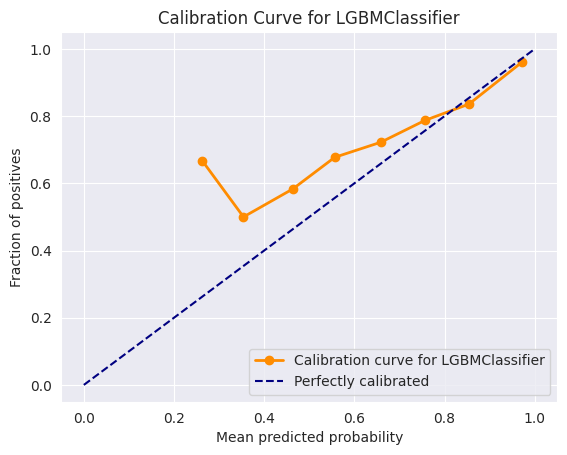

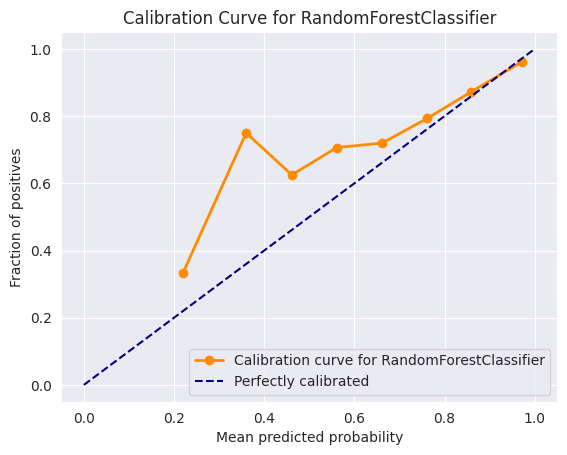

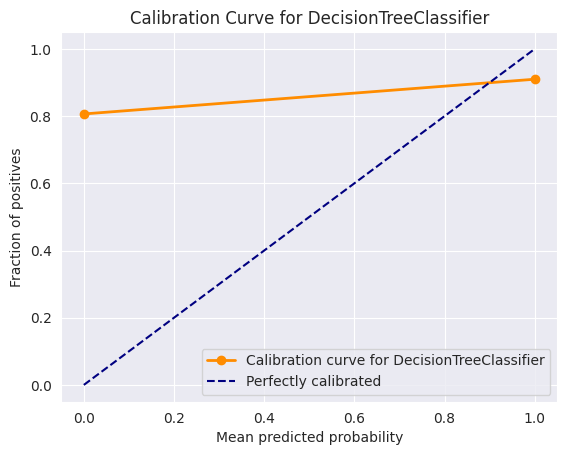

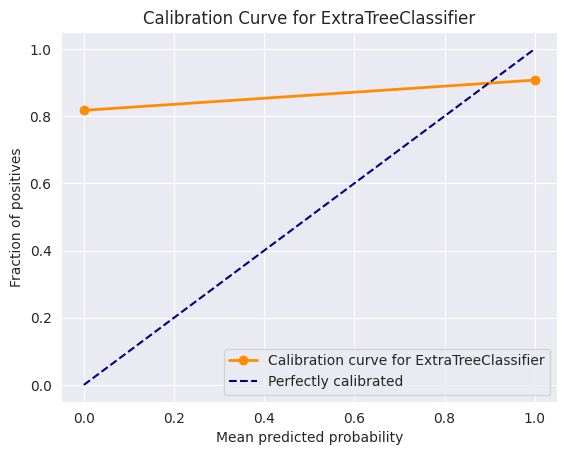

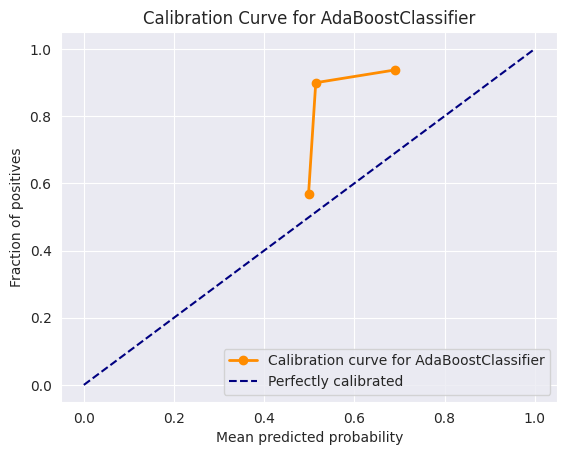

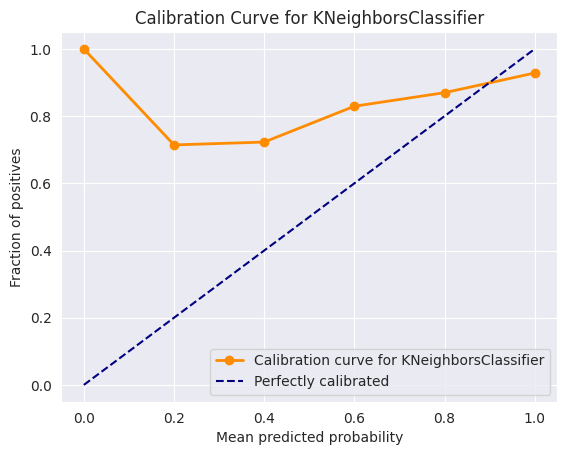

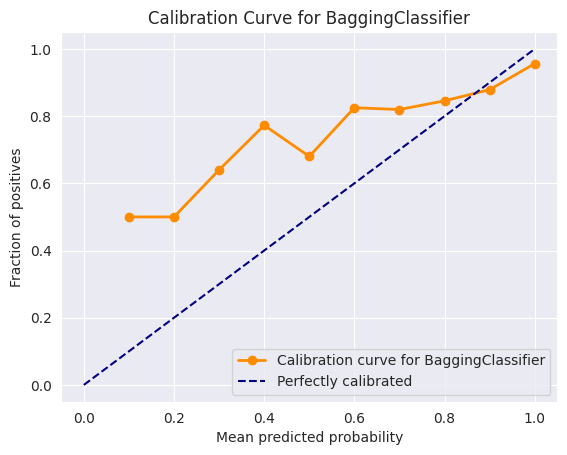

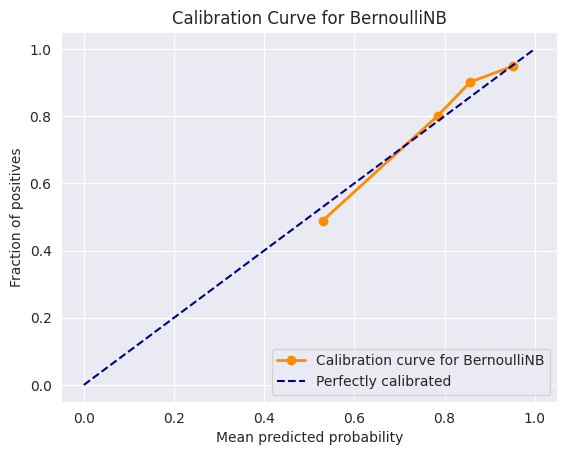

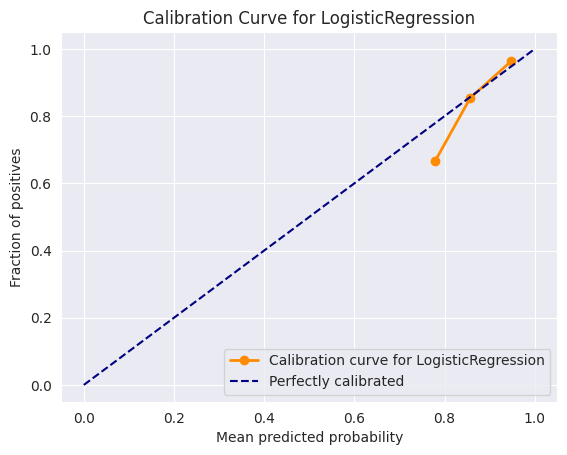

In [ ]:
# Plot Calibration Curves

from sklearn.calibration import calibration_curve

# Initialize an empty list to store evaluation results
calibration_data = []

# Loop through each classifier
for key in classifiers:
    # Current classifier
    clf = classifiers[key]
    # Train classifier on training data
    clf.fit(X_train_scaled, y_train)
    # Check if model supports predict_proba for calibration curve
    if hasattr(clf, "predict_proba"):
        # Make predictions using current classifier
        predictions = clf.predict_proba(X_test_scaled)[:, 1]
        # Compute calibration curve
        prob_true, prob_pred = calibration_curve(y_test, predictions, n_bins=10)
        # Store calibration curve data for current classifier
        calibration_data.append((prob_true, prob_pred))
        # Plot calibration curve
        plt.figure()
        plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='darkorange', lw=2,
                 label=f'Calibration curve for {key}')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Perfectly calibrated')
        plt.xlabel('Mean predicted probability')
        plt.ylabel('Fraction of positives')
        plt.title(f'Calibration Curve for {key}')
        plt.legend(loc="lower right")
        plt.show()

This section demonstrates various visualization techniques and data analysis procedures applied to a dataset in a machine learning context using Python. Here's a high-level overview of its usage:

1. **Feature Importance Analysis**: Utilizes a RandomForestRegressor model to compute feature importances and visualize them in a bar chart. This helps in understanding which features contribute the most to the model's predictions.

2. **Data Visualization**:
   - Pie chart illustrating the distribution of true and false reviews.
   - Pie chart displaying the proportion of each rating category.
   - Count plot showing the distribution of review ratings grouped by labels.
   - Bar plot representing the average length of reviews based on labels.
   - Word clouds depicting frequently occurring words in fake and genuine reviews.
   - Histogram illustrating the distribution of review lengths for fake and genuine reviews.
   - Box plot demonstrating the distribution of average user review lengths for fake and genuine reviews.
   - Line plot for temporal analysis of reviews over time.

3. **Radial Bar Chart**: Displays a radial bar chart representing user engagement, review length, and rating metrics.

4. **Data Preprocessing**:
   - Tokenization of review texts.
   - Saving the updated dataframe as a CSV file.

These visualizations and analyses provide insights into the dataset, helping in understanding the characteristics of the data and informing decision-making processes in machine learning tasks.


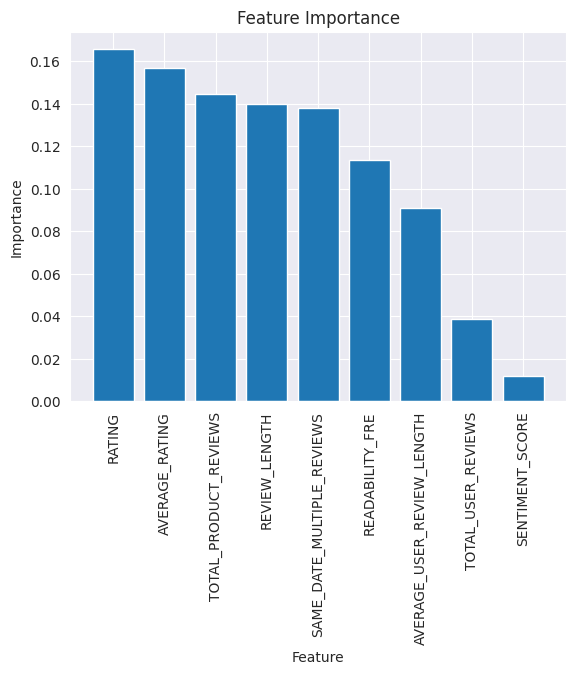

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to features and target variable
model.fit(X, Y)

# Get feature importances
importances = model.feature_importances_

# Get indices of features sorted by importances
indices = np.argsort(importances)[::-1]

# Define column names
column_names = ['RATING', 'AVERAGE_RATING', 'TOTAL_PRODUCT_REVIEWS',
                'REVIEW_LENGTH', 'SAME_DATE_MULTIPLE_REVIEWS', 'READABILITY_FRE',
                'AVERAGE_USER_REVIEW_LENGTH', 'TOTAL_USER_REVIEWS', 'SENTIMENT_SCORE']

# Plot feature importances
plt.figure()
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), column_names, rotation='vertical')  # Set column names as x-axis labels
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

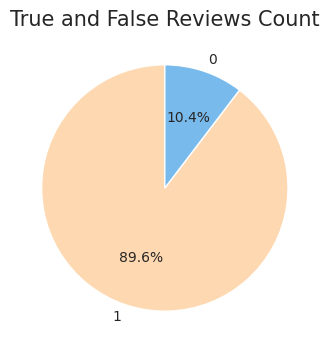

In [ ]:
#Pie Chart on Verified Purchases
colors = ['#FED8B1','#79BAEC']
plt.figure(figsize=(4,4))
label = df['LABEL'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

<Figure size 1500x800 with 0 Axes>

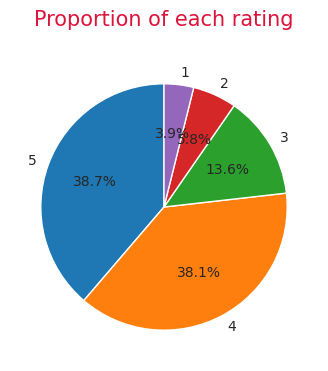

In [ ]:
# Proportion of each rating
plt.figure(figsize=(15,8))
labels = df['RATING'].value_counts().index
values = df['RATING'].value_counts().values

plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.title('Proportion of each rating', fontsize=15, pad=20, color='crimson')
plt.show()

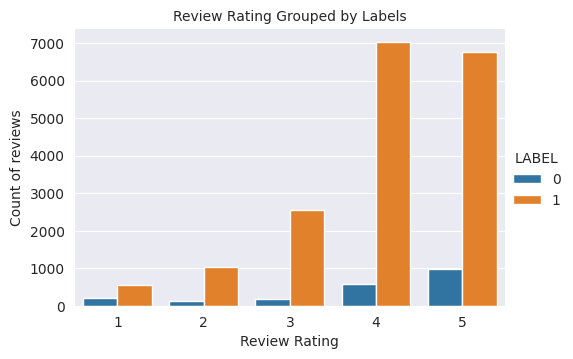

In [ ]:
# Count of review rating grouped by labels
sns.catplot(x ='RATING',kind="count", hue="LABEL", data=df, height=3.5, aspect=1.5)  # Adjust figure size
plt.xlabel("Review Rating", fontsize=10)
plt.ylabel("Count of reviews", fontsize=10)
plt.title("Review Rating Grouped by Labels", fontsize=10)
plt.show()

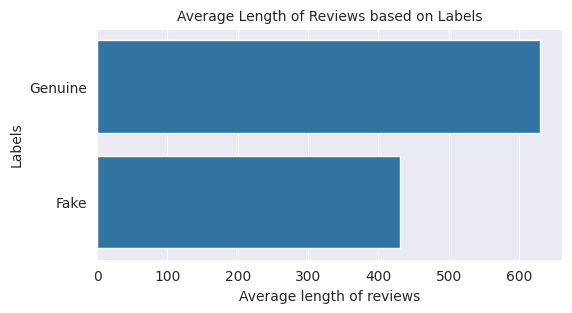

In [ ]:
# Subset the dataframe
cols = ["LABEL", "REVIEW_TEXT"]
vprt = df[cols]

# Filtering based on true and false verified purchases
checkTrue = vprt["LABEL"] == 1
filtered_true = vprt[checkTrue]

checkFalse = vprt["LABEL"] == 0
filtered_false = vprt[checkFalse]

# Average Review length based on true and false verified purchases
false_average_length = filtered_false["REVIEW_TEXT"].apply(len).mean()
true_average_length = filtered_true["REVIEW_TEXT"].apply(len).mean()

# Plot the graph
plt.figure(figsize=(6, 3))  # Adjust the figure size
x = [true_average_length, false_average_length]
y = ["Genuine", "Fake"]
sns.barplot(x=x, y=y)
plt.xlabel("Average length of reviews", fontsize=10)
plt.ylabel("Labels", fontsize=10)
plt.title("Average Length of Reviews based on Labels", fontsize=10)
plt.show()

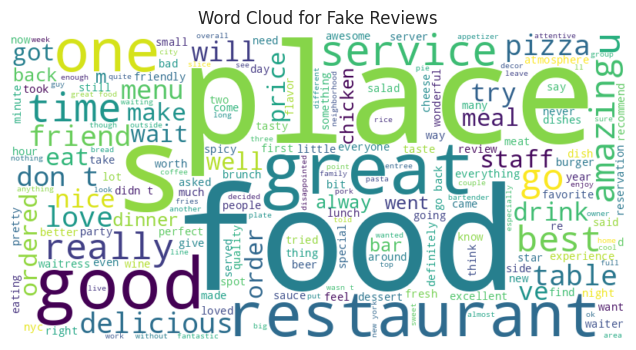

In [ ]:
# Word Cloud for Fake Reviews
fake_reviews = df[df['LABEL'] == 0]['REVIEW_TEXT'].values
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_reviews))

plt.figure(figsize=(9, 4))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake Reviews')
plt.show()

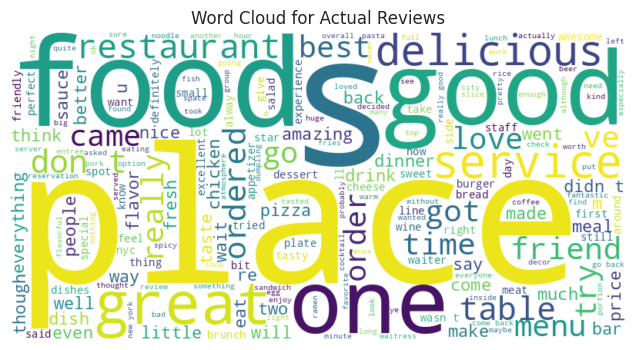

In [ ]:
# Word Cloud for Actual Reviews
actual_reviews = df[df['LABEL'] == 1]['REVIEW_TEXT'].values
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(' '.join(actual_reviews))

plt.figure(figsize=(9, 4))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Actual Reviews')
plt.show()

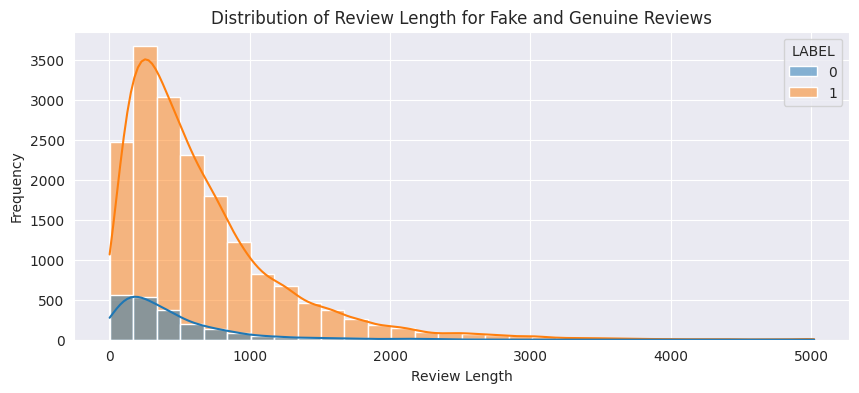

In [ ]:
# Distribution of Review Length for Fake and Genuine Reviews
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='REVIEW_LENGTH', hue='LABEL', kde=True, bins=30)
plt.title('Distribution of Review Length for Fake and Genuine Reviews')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

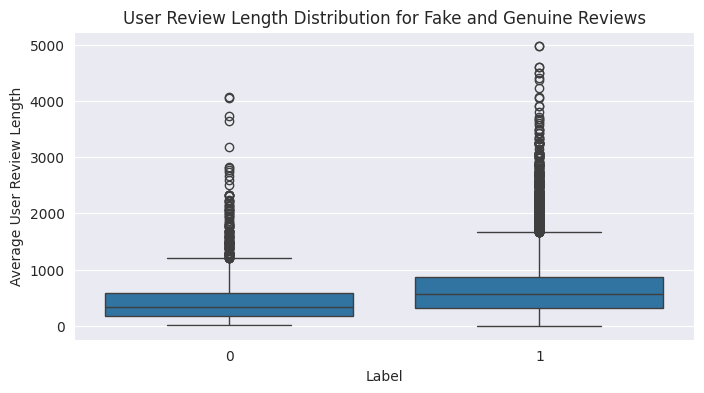

In [ ]:
# User Review Length Distribution for Fake and Genuine Reviews
plt.figure(figsize=(8, 4))
sns.boxplot(x='LABEL', y='AVERAGE_USER_REVIEW_LENGTH', data=df)
plt.title('User Review Length Distribution for Fake and Genuine Reviews')
plt.xlabel('Label')
plt.ylabel('Average User Review Length')
plt.show()

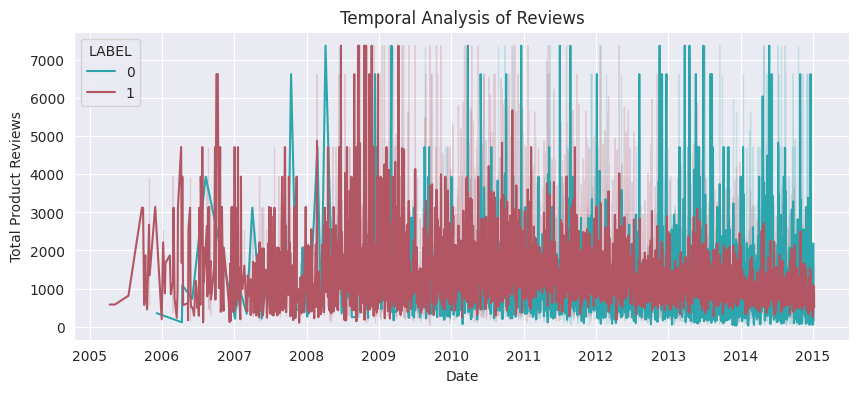

In [ ]:
# Temporal Analysis of Reviews
df['DATE'] = pd.to_datetime(df['DATE'])
plt.figure(figsize=(10, 4))
sns.lineplot(x='DATE', y='TOTAL_PRODUCT_REVIEWS', hue='LABEL', data=df, palette=['#2da5ad', '#b15662'])
plt.title('Temporal Analysis of Reviews')
plt.xlabel('Date')
plt.ylabel('Total Product Reviews')
plt.show()

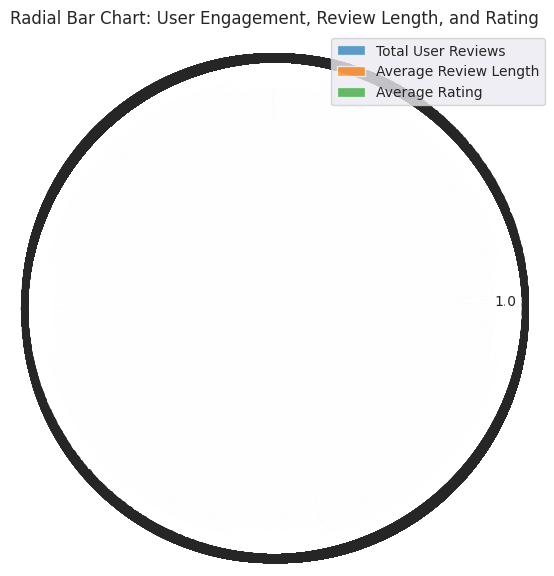

In [ ]:
# Normalize the values for better visualization
df_normalized = df.copy()
df_normalized['TOTAL_USER_REVIEWS_NORM'] = df_normalized['TOTAL_USER_REVIEWS'] / df_normalized['TOTAL_USER_REVIEWS'].max()
df_normalized['AVERAGE_USER_REVIEW_LENGTH_NORM'] = df_normalized['AVERAGE_USER_REVIEW_LENGTH'] / df_normalized['AVERAGE_USER_REVIEW_LENGTH'].max()
df_normalized['AVERAGE_RATING_NORM'] = df_normalized['RATING'] / df_normalized['RATING'].max()

# Create a radial bar chart
theta = np.linspace(0, 2*np.pi, len(df), endpoint=False)
width = 2*np.pi / len(df)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

bars1 = ax.bar(theta, df_normalized['TOTAL_USER_REVIEWS_NORM'], width=width, alpha=0.7, label='Total User Reviews')
bars2 = ax.bar(theta + width, df_normalized['AVERAGE_USER_REVIEW_LENGTH_NORM'], width=width, alpha=0.7, label='Average Review Length')
bars3 = ax.bar(theta + 2*width, df_normalized['AVERAGE_RATING_NORM'], width=width, alpha=0.7, label='Average Rating')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(90)

plt.xticks(theta + width, df['LABEL'].astype(str))
plt.title('Radial Bar Chart: User Engagement, Review Length, and Rating', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

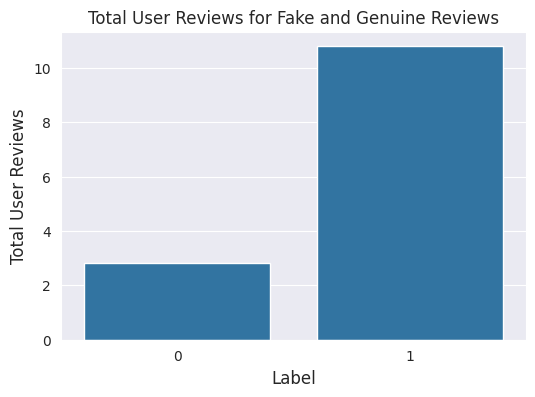

In [ ]:
# Total User Reviews for Fake and Genuine Reviews
plt.figure(figsize=(6, 4))  # Adjust the figure size
sns.barplot(x='LABEL', y='TOTAL_USER_REVIEWS', data=df, ci=None)
plt.title('Total User Reviews for Fake and Genuine Reviews', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Total User Reviews', fontsize=12)
plt.show()

In [ ]:
# Tokenize returns the syllables from a single word
df['REVIEW_TEXT'].apply(word_tokenize).head()

# Save the updated dataframe as a .csv file
df.to_csv('yelp_processed_data.csv')